# **Covid-19 Vaccines Analysis - Guidelines**


# **Phase 5: Project Documentation & Submission**

# **Documentation**

**.** Clearly outline the problem statement, design thinking process, and the phases of development.

**.** Describe the dataset used, data preprocessing steps, and analysis techniques applied.

**.** Present key findings, insights, and recommendations based on the analysis.

# **1. Introduction**

**Country** - this is the country for which the vaccination information is provided; Country ISO Code - ISO code for the country;

 **Date** - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total; Total number of vaccinations - this is the absolute number of total immunizations in the country;
 Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people; Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme; Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country; Daily vaccinations - for a certain data entry, the number of vaccination for that date/country; Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country; Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country; Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country; Number of vaccinations per day - number of daily vaccination for that day and country; Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country; Vaccines used in the country - total number of vaccines used in the country (up to date); Source name - source of the information (national authority, international organization, local organization etc.); Source website - website of the source of information;



# **2.Problem Statment**
Track COVID-19 vaccination in the World, answer instantly to your questions:

Which country is using what vaccine?

In which country the vaccination programme is more advanced?

Where are vaccinated more people per day? But in terms of percent from entire population ?

# **3.Design Thinking Process:**

### **1. Empathize:**

   - Understand the needs and concerns of various stakeholders, including healthcare workers, governments, vaccine manufacturers, and the general public.

   - Gather data on vaccine distribution, coverage, and public sentiment.

  

### **2. Define:**

   - Clearly define the problem statement and research questions.

   - Identify key metrics for vaccine effectiveness, safety, and equitable distribution.

   - Set clear objectives for the analysis.

  

### **3. Ideate:**

   - Brainstorm potential solutions and analytical approaches.

   - Explore different data sources, methods, and technologies for vaccine analysis.

  

### **4. Prototype:**

   - Create data models, dashboards, or visualizations to represent vaccine-related data.

   - Develop a framework for data collection, analysis, and reporting.

   - Test various prototypes for usability and effectiveness.

  

### **5. Test:**

   - Analyze vaccine-related data to assess their impact on COVID-19 cases, hospitalizations, and mortality.

   - Evaluate the safety and side effects of vaccines through real-world data.

   - Review the effectiveness of vaccination campaigns and distribution strategies.

  

### **6. Implement:**

   - Deploy the chosen analytical model or framework to conduct ongoing vaccine analysis.

   - Communicate findings to relevant stakeholders through reports, dashboards, or presentations.

  

### **7. Learn:**

   - Continuously monitor and update the analysis as new data becomes available.

   - Adapt strategies and recommendations based on evolving circumstances and emerging variants of the virus.

# **4.Phases of Development:**

  
### **1. Data Collection:**

   - Gather data on vaccine distribution, administration, and coverage.

   - Collect data on COVID-19 cases, hospitalizations, and mortality.

   - Obtain data on vaccine efficacy and safety from clinical trials and real-world studies.

  

### **2. Data Cleaning and Preprocessing:**

   - Clean, validate, and preprocess the collected data to ensure accuracy and consistency.

  

### **3. Data Analysis:**

   - Analyze the data to assess vaccine effectiveness in preventing infections, reducing transmission, and mitigating disease severity.

   - Evaluate vaccine safety, including adverse events and side effects.

  

### **4. Visualization and Reporting:**

   - Create visualizations, dashboards, and reports to present the analysis findings.

   - Communicate the impact of vaccination campaigns on the pandemic's trajectory.

  

### **5. Policy Recommendations:**

   - Provide recommendations for policy changes, vaccine distribution strategies, and public health measures based on the analysis.

  

### **6. Continuous Monitoring:**

   - Ongoing monitoring of vaccine performance, safety, and distribution.

   - Adapt the analysis and recommendations as new data becomes available.

   

  

The design thinking process and phases of development provide a structured approach to addressing the complex issue of COVID-19 vaccine analysis, with a focus on data-driven decision-making and continuous improvement

# **5. Data Preprocessing**

Our dataset is based on 3 columns : Title, Abstract, Full body text. In this notebook, we focused only on english scientific papers. For this, we used the package NLTK to apply a filter on the title.

Our data preprocessing consists in :

Remvoing URLs

removing digits

removing stopwords

set in lower case the data

Tokenizing the text

Lemmatizing the keywords.
We applied a filter to take only articles with more than 200 tokens, these tokens are the result of the concatenantion of tokens generated by the 3 columns cited above.

As a result of this step,we will train our Doc2Vec Model on 27 877 scientific papers.

In [ ]:
#Install spacy & spacylangdetect to take only english articles
!pip install spacy
!pip install spacy-langdetect
!mkdir output

Requirement already satisfied: spacy in /opt/conda/lib/python3.6/site-packages (2.2.3)
Requirement already satisfied: blis<0.5.0,>=0.4.0 in /opt/conda/lib/python3.6/site-packages (from spacy) (0.4.1)
Requirement already satisfied: preshed<3.1.0,>=3.0.2 in /opt/conda/lib/python3.6/site-packages (from spacy) (3.0.2)
Requirement already satisfied: thinc<7.4.0,>=7.3.0 in /opt/conda/lib/python3.6/site-packages (from spacy) (7.3.1)
Requirement already satisfied: catalogue<1.1.0,>=0.0.7 in /opt/conda/lib/python3.6/site-packages (from spacy) (1.0.0)
Requirement already satisfied: cymem<2.1.0,>=2.0.2 in /opt/conda/lib/python3.6/site-packages (from spacy) (2.0.3)
Requirement already satisfied: numpy>=1.15.0 in /opt/conda/lib/python3.6/site-packages (from spacy) (1.18.2)
Requirement already satisfied: setuptools in /opt/conda/lib/python3.6/site-packages (from spacy) (46.1.3.post20200330)
Requirement already satisfied: srsly<1.1.0,>=0.1.0 in /opt/conda/lib/python3.6/site-packages (from spacy) (1.0.2)
Requirement already satisfied: wasabi<1.1.0,>=0.4.0 in /opt/conda/lib/python3.6/site-packages (from spacy) (0.6.0)
Requirement already satisfied: requests<3.0.0,>=2.13.0 in /opt/conda/lib/python3.6/site-packages (from spacy) (2.22.0)
Requirement already satisfied: plac<1.2.0,>=0.9.6 in /opt/conda/lib/python3.6/site-packages (from spacy) (0.9.6)
Requirement already satisfied: murmurhash<1.1.0,>=0.28.0 in /opt/conda/lib/python3.6/site-packages (from spacy) (1.0.2)
Requirement already satisfied: tqdm<5.0.0,>=4.10.0 in /opt/conda/lib/python3.6/site-packages (from thinc<7.4.0,>=7.3.0->spacy) (4.42.0)
Requirement already satisfied: importlib-metadata>=0.20; python_version < "3.8" in /opt/conda/lib/python3.6/site-packages (from catalogue<1.1.0,>=0.0.7->spacy) (1.5.0)
Requirement already satisfied: idna<2.9,>=2.5 in /opt/conda/lib/python3.6/site-packages (from requests<3.0.0,>=2.13.0->spacy) (2.8)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /opt/conda/lib/python3.6/site-packages (from requests<3.0.0,>=2.13.0->spacy) (1.24.3)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /opt/conda/lib/python3.6/site-packages (from requests<3.0.0,>=2.13.0->spacy) (3.0.4)
Requirement already satisfied: certifi>=2017.4.17 in /opt/conda/lib/python3.6/site-packages (from requests<3.0.0,>=2.13.0->spacy) (2019.11.28)
Requirement already satisfied: zipp>=0.5 in /opt/conda/lib/python3.6/site-packages (from importlib-metadata>=0.20; python_version < "3.8"->catalogue<1.1.0,>=0.0.7->spacy) (2.2.0)
Collecting spacy-langdetect
  Downloading spacy_langdetect-0.1.2-py3-none-any.whl (5.0 kB)
Collecting langdetect==1.0.7
  Downloading langdetect-1.0.7.zip (998 kB)
     |████████████████████████████████| 998 kB 6.3 MB/s eta 0:00:01
Requirement already satisfied: pytest in /opt/conda/lib/python3.6/site-packages (from spacy-langdetect) (5.0.1)
Requirement already satisfied: six in /opt/conda/lib/python3.6/site-packages (from langdetect==1.0.7->spacy-langdetect) (1.14.0)
Requirement already satisfied: py>=1.5.0 in /opt/conda/lib/python3.6/site-packages (from pytest->spacy-langdetect) (1.8.1)
Requirement already satisfied: packaging in /opt/conda/lib/python3.6/site-packages (from pytest->spacy-langdetect) (20.3)
Requirement already satisfied: attrs>=17.4.0 in /opt/conda/lib/python3.6/site-packages (from pytest->spacy-langdetect) (19.3.0)
Requirement already satisfied: more-itertools>=4.0.0 in /opt/conda/lib/python3.6/site-packages (from pytest->spacy-langdetect) (8.2.0)
Requirement already satisfied: atomicwrites>=1.0 in /opt/conda/lib/python3.6/site-packages (from pytest->spacy-langdetect) (1.3.0)
Requirement already satisfied: pluggy<1.0,>=0.12 in /opt/conda/lib/python3.6/site-packages (from pytest->spacy-langdetect) (0.13.1)
Requirement already satisfied: importlib-metadata>=0.12 in /opt/conda/lib/python3.6/site-packages (from pytest->spacy-langdetect) (1.5.0)
Requirement already satisfied: wcwidth in /opt/conda/lib/python3.6/site-packages (from pytest->spacy-langdetect) (0.1.9)
Requirement already satisfied: pyparsing>=2.0.2 in /opt/conda/lib/python3.6/site-packages (from packaging->pytest->spacy-langdetect) (2.4.6)
Requirement already satisfied: zipp>=0.5 in /opt/conda/lib/python3.6/site-packages (from importlib-metadata>=0.12->pytest->spacy-langdetect) (2.2.0)
Building wheels for collected packages: langdetect
  Building wheel for langdetect (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993461 sha256=1daf40c185a71eb97826f94beb2baa8e5d1407fb70b5ec92b1a1ce6739ccbb51
  Stored in directory: /root/.cache/pip/wheels/b7/fc/78/21a8a2e77805c9f5d82a50188f3e10473f7028a470b6a976b1
Successfully built langdetect
Installing collected packages: langdetect, spacy-langdetect
Successfully installed langdetect-1.0.7 spacy-langdetect-0.1.2

In [ ]:
import re
from spacy_langdetect import LanguageDetector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import json
from nltk.corpus import stopwords
from copy import deepcopy
from langdetect import detect
import numpy as np
import os
import spacy
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
from tqdm.notebook import tqdm
import string
import gensim
from pprint import pprint
from gensim.models.doc2vec import Doc2Vec
from sklearn.neighbors import NearestNeighbors
import re

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...

[nltk_data]   Package wordnet is already up-to-date!

In [ ]:
class CleanAndTokenizeText(BaseEstimator, TransformerMixin):

    def tokenizer(self, input_text):
       tokens = re.split('\W+', input_text)
       return tokens

    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)

    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans('', '', punct)
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)

    def to_lower(self, input_text):
        return input_text.lower()

    def remove_stopwords_and_non_latin_words(self, words):
        stopwords_list = stopwords.words('english')
        stopwords_list.append('al')
        stopwords_list.append('et')
        stopwords_list.append('also')
        whitelist=[]
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
        return clean_words

    def stemming(self, words):
        porter = PorterStemmer()
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)

    def lemma(self,words):
        lemmatizer = WordNetLemmatizer()
        stemmed_words = [lemmatizer.lemmatize(word) for word in words]
        return stemmed_words

    def english_only(self, words):
      english_words = []
      for word in words:
        if detect(word) == 'en':
          english_words.append(word)
      return english_words


def transform(text):
  ct = CleanAndTokenizeText()
  text_st = str(text)
  clean_x = ct.remove_urls(text_st)
  clean_x = ct.remove_punctuation(clean_x)
  clean_x = ct.remove_digits(clean_x)
  clean_x = ct.to_lower(clean_x)
  clean_x = ct.tokenizer(clean_x)
  clean_x = ct.remove_stopwords_and_non_latin_words(clean_x)
  clean_x = ct.lemma(clean_x)
  return clean_x

In [ ]:
#Reading Dataset
df_clean_biorxiv = pd.read_csv('../input/covid19-challenge-dataset/biorxiv_clean.csv')
df_clean_pmc = pd.read_csv('../input/covid19-challenge-dataset/clean_pmc.csv')
df_clean_ncu = pd.read_csv('../input/covid19-challenge-dataset/clean_noncomm_use.csv')
df_clean_cu = pd.read_csv('../input/covid19-challenge-dataset/clean_comm_use.csv')

#Concatenate all datasets in one dataframe
final_frames = [df_clean_biorxiv, df_clean_pmc, df_clean_ncu, df_clean_cu]
df_final = pd.concat(final_frames)

#remove null data from title, texte, abstract columns
df_final['title'] = df_final['title'].fillna('')
df_final['text'] = df_final['text'].fillna('')
df_final['abstract'] = df_final['abstract'].fillna('')


#detect language of articles using title
df_final['lang'] = df_final['title'].apply(lambda title : nlp(title)._.language['language'])

In [ ]:
df_final.head(3)

In [ ]:
#Clean title, text and abstract
df_final['title_tokenized'] = df_final['title'].apply(lambda x : transform(x))
df_final['text_tokenized'] = df_final['text'].apply(lambda x : transform(x))
df_final['abstract_tokenized'] = df_final['abstract'].apply(lambda x : transform(x))

In [ ]:
#Combine title, text, and abstract
df_final['complete_text_tokenized'] = df_final['title_tokenized'] + df_final['text_tokenized'] + df_final['abstract_tokenized']
#Take only entries with more than 200 keywords
df_final = df_final[df_final['complete_text_tokenized'].map(len) > 200]
#Take only english entries
df_final = df_final[df_final['lang'] == 'en']

In [ ]:
#Describing our final dataframe.
df_final['complete_text_tokenized'].describe

# **6.Analysis techniques:**

Before moving for analysis, we make some of the key steps that we follow in this notebook to make ourself on the track for what we are doing.



. Load the Dataset.

. Understand the Dataset i.e. Mean, Median, Min, Max, etc.

. Handle Missing Values.

. Normalize the Dataset where required.

. Perform Feature Engineering.

. Analysis the Dataset and make prediction.

## **Load the Dataset**

In [ ]:

# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import missingno
import geopandas

In [ ]:

df = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
df.head()

Length of the dataset is: 7488

In [ ]:
df.describe()

In [ ]:
missingno.bar(df);

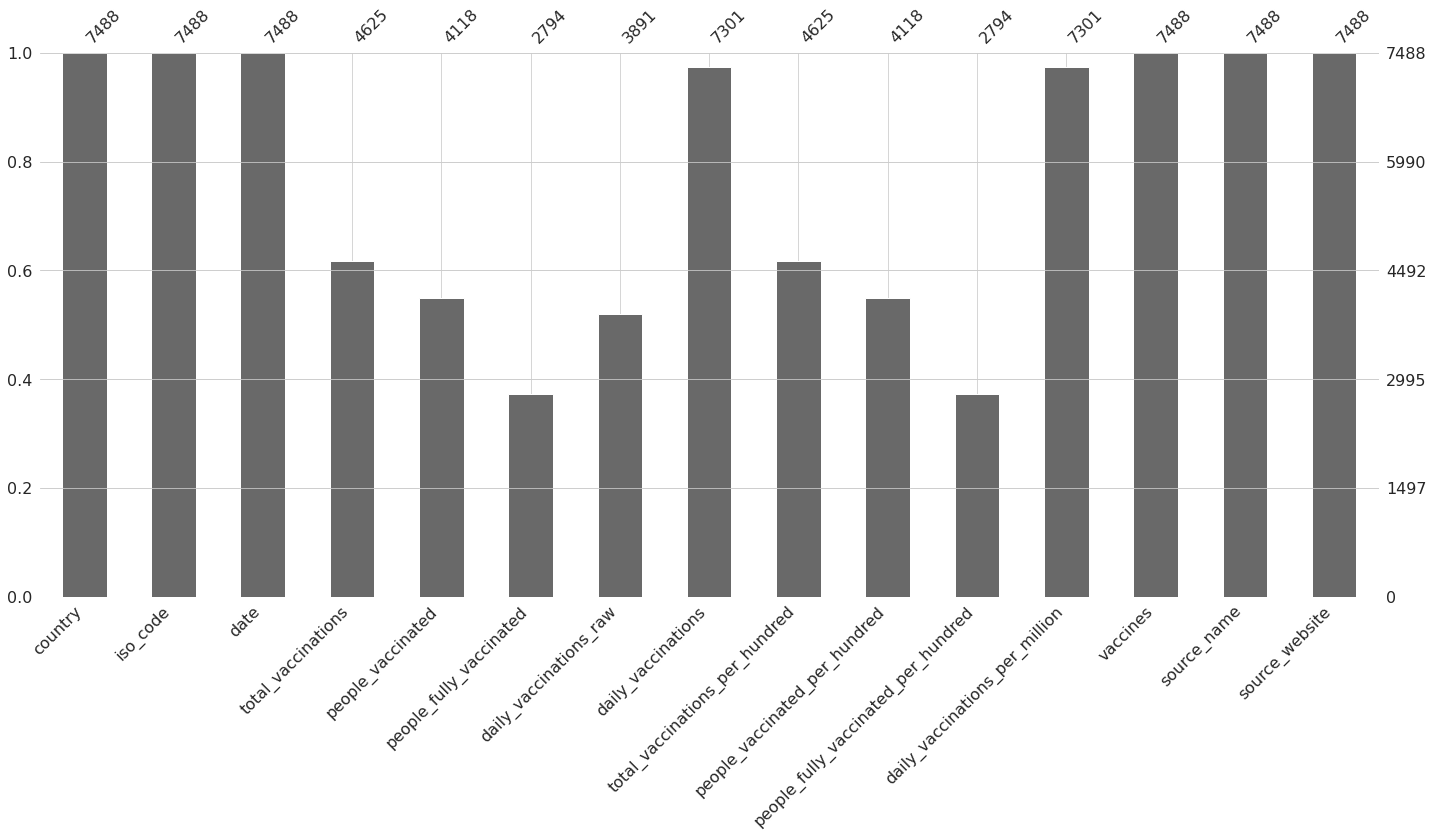

So, seven columns in the dataset have the null values. and people_fully_vaccinated and people_fully_vaccinated_per_hundered have the maximum null values.

## **Hangling the Missing Values**

In this section, we fill all the missing values present in the dataset. This makes our dataset more consistent for performing the EDA.

In [ ]:

df.head()

In [ ]:

data = df.isna().sum()/len(df)
for i in range(len(data)):
    if data[i] != 0.0:
        print(data.index[i], ": ", data[i])

total_vaccinations : 0.38234508547008544

people_vaccinated : 0.4500534188034188

people_fully_vaccinated : 0.6268696581196581

daily_vaccinations_raw : 0.48036858974358976

daily_vaccinations : 0.0249732905982906

total_vaccinations_per_hundred : 0.38234508547008544

people_vaccinated_per_hundred : 0.4500534188034188

people_fully_vaccinated_per_hundred : 0.6268696581196581

daily_vaccinations_per_million : 0.0249732905982906

In most of the cases we cannot say that, at the particular date how many people are accuared by the vaccination. So, keep the dataset stable, we fill the missing value with the 0, considoring that at a particular date no one got the vaccine. For the reason, we find out when we perform the EDA.

In [ ]:

df.total_vaccinations.fillna(0.0, inplace=True)
df.people_vaccinated.fillna(0.0, inplace=True)
df.people_fully_vaccinated.fillna(0.0, inplace=True)
df.daily_vaccinations_raw.fillna(0.0, inplace=True)
df.total_vaccinations_per_hundred.fillna(0.0, inplace=True)
df.people_vaccinated_per_hundred.fillna(0.0, inplace=True)
df.people_fully_vaccinated_per_hundred.fillna(0.0, inplace=True)
df.dropna(inplace=True)

In [ ]:

df.isna().sum()/len(df)

So, now we don't have any missing value in our dataset. Currently we fill all the missing value with the 0.0 as we don't have idea about the value to be filled in place of the missing value.

## **Feature Engineering**


in this section, we create new fields from the existing dataset so that we can make our prediction more clean and understandable

In [ ]:
df.head()

We can perform the feature engineering over:

. date column

. vaccines column

In [ ]:
date_month = [date.split('-')[1] for date in df.date]
df['date_month'] = date_month

In [ ]:
vaccines = []
for vaccine in df.vaccines:
    vaccines.extend(vaccine.split(','))
vaccines_update = {}
for i in vaccines:
    vaccines_update[i] = vaccines.count(i)
vaccines_update

## **7. Key Findings with Data Visualizations**

## **Part 1: World Comparasion**

In [ ]:
df.head()

In [ ]:
0	AFG	Asia	Afghanistan	2020-02-24	5.00	5.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	39,835,428.00
1	AFG	Asia	Afghanistan	2020-02-25	5.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	39,835,428.00
2	AFG	Asia	Afghanistan	2020-02-26	5.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	39,835,428.00
3	AFG	Asia	Afghanistan	2020-02-27	5.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	39,835,428.00
4	AFG	Asia	Afghanistan	2020-02-28	5.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	39,835,428.00

In [ ]:
world_comparasion=df.groupby('location')['continent','total_cases','total_deaths','people_vaccinated','population'].max().sort_values(by='location',ascending=False).reset_index()
world_comparasion['percent_population_vaccinated']=world_comparasion['people_vaccinated']/world_comparasion['population']
world_comparasion['percent_population_death']=world_comparasion['total_deaths']/world_comparasion['population']
world_comparasion= world_comparasion.loc[world_comparasion['location'] != world_comparasion['continent']].reset_index(drop=True)
world_comparasion

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.

In [ ]:
country_pop_more_than_10m= world_comparasion[world_comparasion['population']>10000000]

In [ ]:
# 1. Top 8 countries (population > 10 millons) have the most covid cases
top_8_total_cases = country_pop_more_than_10m[['location','population','total_cases']].sort_values(by='total_cases',ascending=False).reset_index(drop=True).head(8)

sns.set_theme(style='white')
f, ax = plt.subplots(figsize=(10, 6))
ax= sns.barplot(x='total_cases' , y='location', data=top_8_total_cases, palette='rocket')
sns.despine(left=True, bottom=True)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)

ax.axes.set_title('Top 8 countires that have the most covid cases',fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Countries',fontsize=12, labelpad=20)

#set annotation
for p in ax.patches:
    ax.annotate('{:,}'.format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha='left', va='center', color='black', fontsize=11);

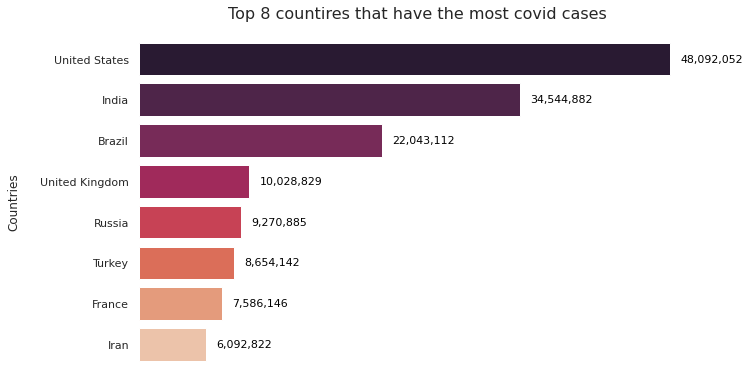

2. The top 8 European countries (population  > 10 million) have the highest percentage of vaccinated population.

In [ ]:
# 2. The top 8 European countries (with a population of more than 10 million) have the highest percentage of vaccinated citizens.
top_8_percent_population_vaccinated_EU=country_pop_more_than_10m[country_pop_more_than_10m.continent=='Europe'].sort_values(by='percent_population_vaccinated', ascending=False).head(8)

sns.set_theme(style='white')
f, ax = plt.subplots(figsize=(10, 6))
ax= sns.barplot(x='percent_population_vaccinated' , y='location', data=top_8_percent_population_vaccinated_EU, palette='bone')
sns.despine(left=True, bottom=True)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)


ax.axes.set_title('Top 8 European countries (population  > 10 million) have the highest percentage of vaccinated population',fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Countries',fontsize=12, labelpad=20)

#set annotation
for p in ax.patches:
    ax.annotate('{:,.2f}%'.format(float(p.get_width())*100), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha='left', va='center', color='black', fontsize=11);

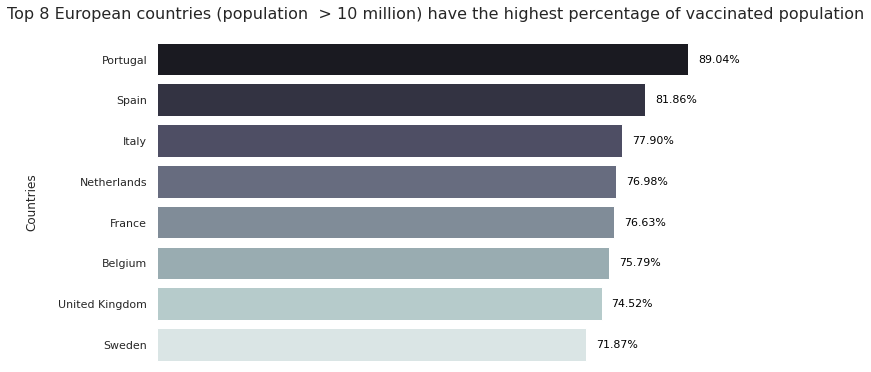

3. The top 8 countries in North America (population > 10 million) have the highest rate of COVID-related population deaths

In [ ]:
#3. The top 8 countries in North America (population > 10 million) have the highest rate of COVID-related population deaths.

top_8_percent_population_death_NA=country_pop_more_than_10m[country_pop_more_than_10m.continent=='North America'].sort_values(by='percent_population_death', ascending=False).head(8)


sns.set_theme(style='white')
f, ax = plt.subplots(figsize=(10, 6))
ax= sns.barplot(x='percent_population_death', y='location', data=top_8_percent_population_death_NA, palette='pink')
sns.despine(left=True, bottom=True)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)


ax.axes.set_title('Top 8 countries in North America (population > 10 million) have the highest rate of COVID-related population deaths',fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Countries',fontsize=12, labelpad=20)

#set annotation
for p in ax.patches:
    ax.annotate('{:,.2f}%'.format(float(p.get_width())*100), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha='left', va='center', color='black', fontsize=11);




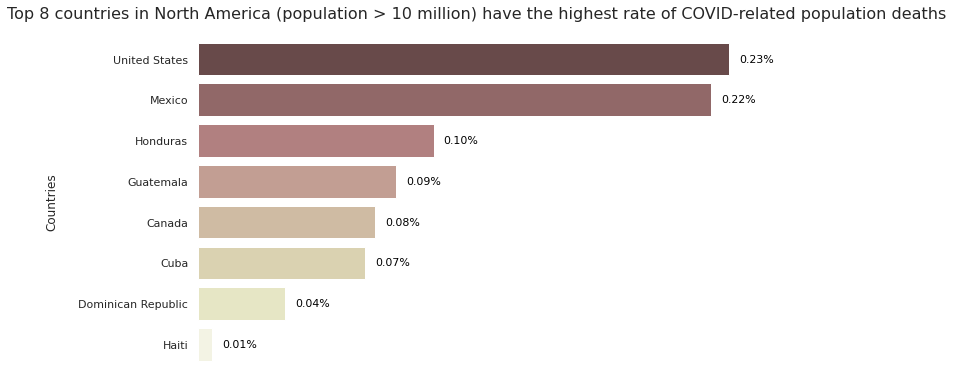

### **Part 2: Canada Covid Analysis**

In [ ]:
Canada_covid=df[df.location == 'Canada']
Canada_covid['percent_population_vaccinated'] = Canada_covid.loc[:,'people_vaccinated']/Canada_covid.loc[:,'population']
Canada_covid.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

### **1. Get a quick look**

The latest Canada Covid-related info

In [ ]:
Canada_covid.iloc[-1].to_frame()[2:]

Get a quick look to see the relationships between the number of icu patients, hospital patients, new deaths, and the percentage of the population vaccinated in Canada. The below heatmap and pairplot shows that new cases are positively related to the number of hospital patients, icu patients, new deaths, and the percentage of the population vaccinated in Canada.

In [ ]:
f, ax = plt.subplots()
sns.heatmap(Canada_covid[['new_cases','hosp_patients','icu_patients','new_deaths','percent_population_vaccinated']].corr(),annot=True,cmap='Blues');
sns.set(style='ticks', color_codes=True)
sns.pairplot(Canada_covid[['new_cases','hosp_patients','icu_patients','new_deaths','percent_population_vaccinated']], kind='reg', plot_kws={'line_kws':{'color':'red'}});

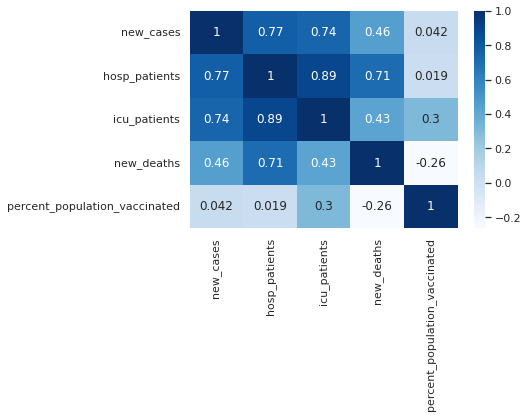

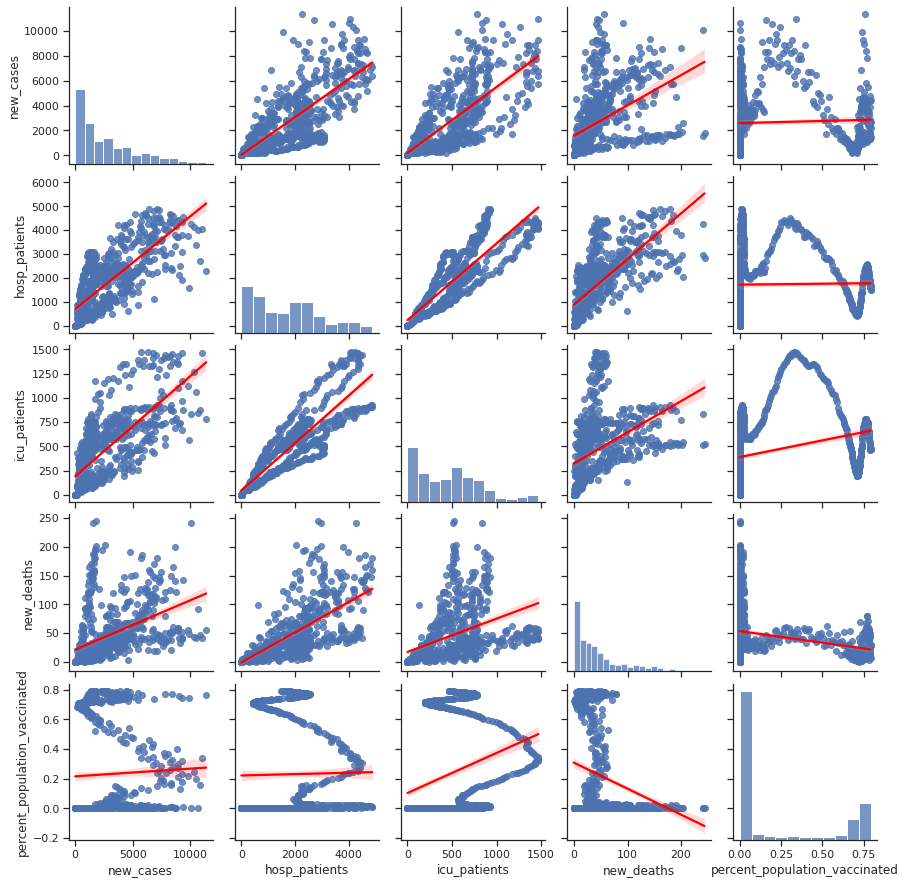

## **8.** **Insight**

### **Insight 1**

We can see that before the first vaccination date in Canada:

New COVID cases were positively associated with hospital patients (corr = 0.60), icu patients (corr = 0.65), and new deaths (corr = 0.45).

The number of hospital patients was highly associated with the number of ICU patients (corr = 0.95), and the number of new deaths (corr = 0.88).

The number of ICU patients was highly associated with the number of new deaths (corr = 0.89).

**2) The second period - between the 1st vaccination date and the date with the lowest number of new cases (2020-12-14 ~ 2021-07-01)**

Note: At the time this project is being completed the lowest new case date in Canada is 2021-07-01.The time frame may change as real-world scenarios change.

**Question: How did the situation with COVID in Canada between the 1st vaccination date and the date with the lowest number of new cases?**

In [ ]:
#b/t the 1st vaccination date and the lowest new cases date
between_1st_and_lowest_new_cases =Canada_covid[(Canada_covid.date > first_vaccine_datetime) & (Canada_covid.date <lowest_new_cases_datetime)]

sns.heatmap(between_1st_and_lowest_new_cases[['new_cases','new_deaths','icu_patients','hosp_patients','percent_population_vaccinated']].corr(),annot=True,cmap='Blues');

sns.set(style='ticks', color_codes=True)
f, axes = plt.subplots(1,4,figsize=(14, 4), sharex=True)

# Plot a simple distribution of the desired columns
sns.regplot(data=between_1st_and_lowest_new_cases,x='percent_population_vaccinated', y='new_cases', line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(data=between_1st_and_lowest_new_cases,x='percent_population_vaccinated', y='new_deaths', line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(data=between_1st_and_lowest_new_cases,x='percent_population_vaccinated', y='hosp_patients',line_kws={'color': 'red'},ax=axes[2])
sns.regplot(data=between_1st_and_lowest_new_cases,x='percent_population_vaccinated', y='icu_patients', line_kws={'color': 'red'}, ax=axes[3])
sns.despine(left=True, bottom=True)


plt.setp(axes, yticks=[])
plt.tight_layout()

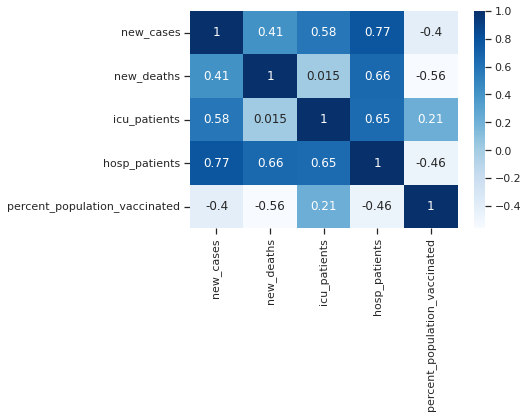

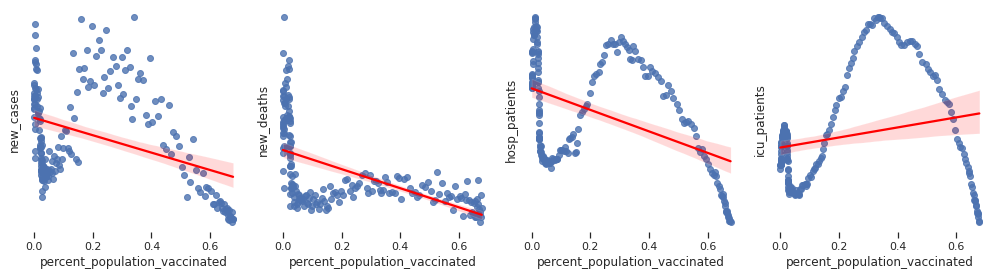

## **Insight 2**

We can see that between the 1st vaccination date and the lowest new case date (2020-12-14 ~ 2021-07-01) in Canada, the percentage of the population that got vaccinated is

negatively associated with the number of new COVID cases (corr= -0.4)

negatively associated with new deaths (corr= -0.56)

negatively associated with hospital patients (corr= -0.46)

However, it does not decrease the number of icu patients (corr=0.21) at this time.

**3)The third period - after the date with the lowest number of new cases (after 2021-07-01)**

Note: At the time this project is being completed the lowest new case date in Canada is 2021-07-01.The time frame may change as real-world scenarios change.

Questions: How did the COVID situation in Canada look like after the date with the lowest number of new cases?

In [ ]:
#after the lowest new cases date
after_lowest_new_cases = Canada_covid[Canada_covid.date >lowest_new_cases_datetime]

sns.heatmap(after_lowest_new_cases[['new_cases','new_deaths','icu_patients','hosp_patients','percent_population_vaccinated']].corr(),annot=True,cmap='Blues');

sns.set(style='ticks', color_codes=True)
f, axes = plt.subplots(1,4,figsize=(14, 4), sharex=True)

# Plot a simple distribution of the desired columns
sns.regplot(data=after_lowest_new_cases,x='percent_population_vaccinated', y='new_cases', line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(data=after_lowest_new_cases,x='percent_population_vaccinated', y='new_deaths', line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(data=after_lowest_new_cases,x='percent_population_vaccinated', y='hosp_patients', line_kws={'color': 'red'},ax=axes[2])
sns.regplot(data=after_lowest_new_cases,x='percent_population_vaccinated', y='icu_patients',line_kws={'color': 'red'}, ax=axes[3])
sns.despine(left=True, bottom=True)


plt.setp(axes, yticks=[])
plt.tight_layout()

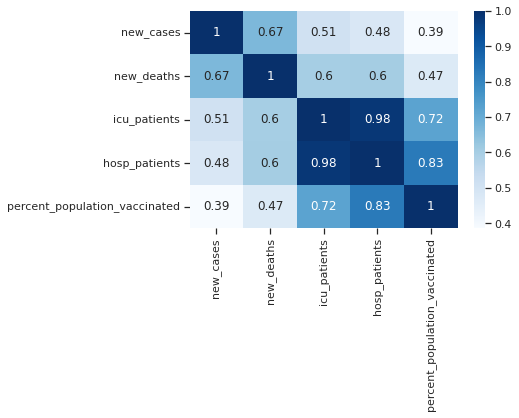

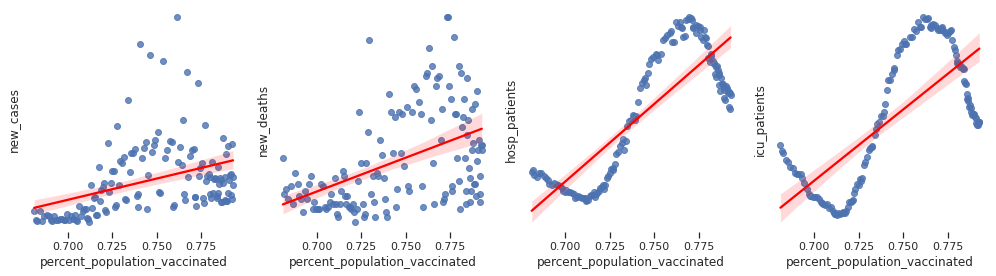

## **Insight 3**

We can see that after the lowest new case date (after 2021-07-01) in Canada, the percentage of the population that got vaccinated is again

postively associated with the number of new COVID cases (corr=0.39)

postively associated with the number of new deaths (corr=0.47)

postively associated with the number of icu patients (corr=0.72)

postively associated with the number of hospital patients (corr=0.83)

**4) Examine how the vaccination rate of the population affects new deaths, ICU patients, and hospital patients in Canada over time.**

In [ ]:
#New deaths time series
sns.set_theme(style='ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(Canada_covid.date, Canada_covid.new_deaths, 'red', label = 'new deaths', linewidth = 4, alpha= 0.6)

ax2 = ax.twinx()
ax2.plot(Canada_covid.date, Canada_covid.percent_population_vaccinated, 'green', label = 'share of population vaccinated',linewidth = 4, alpha= 0.7)

ax.set_xlabel('date')
ax.set_ylabel(r'New Deaths', labelpad=20)
ax2.set_ylabel(r'Vaccinated Population as a Percentage', labelpad=20)

ax.axes.set_title('How does the percentage of the population vaccinated \naffect new deaths in Canada overtime?',fontsize=16, weight='bold', pad=40)

sns.despine(left=True, bottom=True)

fig.legend(loc=1, bbox_to_anchor=(0.32,1), bbox_transform=ax.transAxes);



#ICU patients time series
sns.set_theme(style='ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(Canada_covid.date, Canada_covid.icu_patients, 'maroon', label = 'ICU patients', linewidth = 4, alpha= 0.6)


ax2 = ax.twinx()
ax2.plot(Canada_covid.date, Canada_covid.percent_population_vaccinated, 'green', label = 'share of population vaccinated',linewidth = 4, alpha= 0.7)
ax.set_xlabel('date')
ax.set_ylabel(r'ICU patients', labelpad=20)
ax2.set_ylabel(r'Vaccinated Population as a Percentage', labelpad=20)

ax.axes.set_title('How does the percentage of the population vaccinated \naffect ICU patients in Canada overtime?',fontsize=16, weight='bold', pad=40)

sns.despine(left=True, bottom=True)

fig.legend(loc=1, bbox_to_anchor=(0.32,1), bbox_transform=ax.transAxes);

#Hospital patients time series
sns.set_theme(style='ticks')
sns.set_context('notebook')

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(Canada_covid.date, Canada_covid.hosp_patients, 'orange', label = 'hospital patients', linewidth = 4, alpha= 0.6)


ax2 = ax.twinx()
ax2.plot(Canada_covid.date, Canada_covid.percent_population_vaccinated, 'green', label = 'share of population vaccinated',linewidth = 4, alpha= 0.7)
ax.set_xlabel('date')
ax.set_ylabel(r'Hospital patients', labelpad=20)
ax2.set_ylabel(r'Vaccinated Population as a Percentage', labelpad=20)

ax.axes.set_title('How does the percentage of the population vaccinated \naffect Hospital patients in Canada overtime?',fontsize=16, weight='bold', pad=40)

sns.despine(left=True, bottom=True)

fig.legend(loc=1, bbox_to_anchor=(0.32,1), bbox_transform=ax.transAxes);

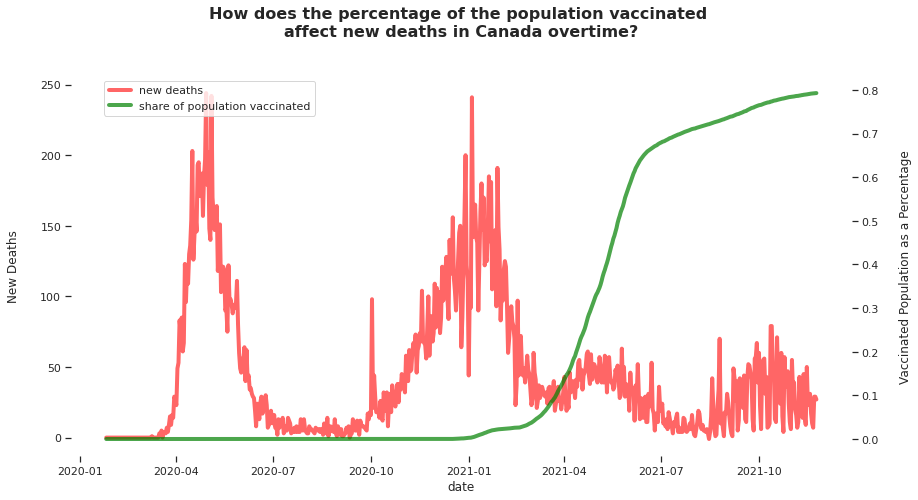

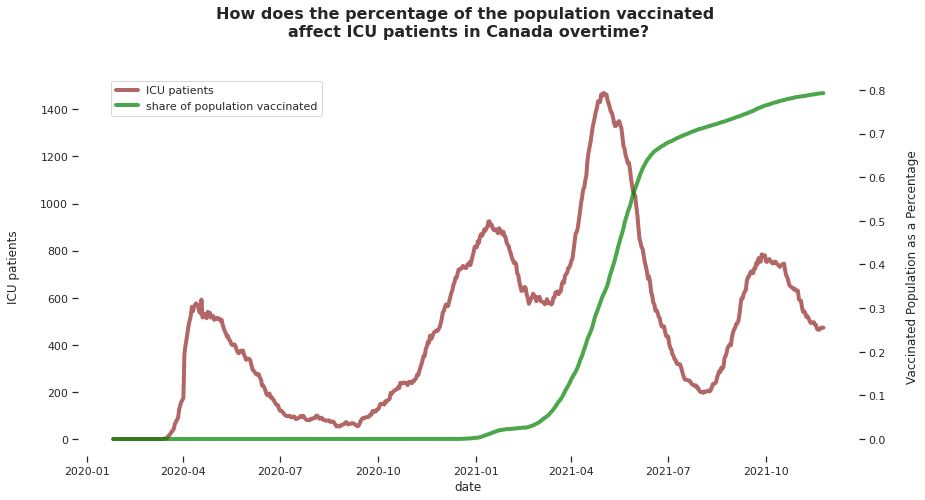

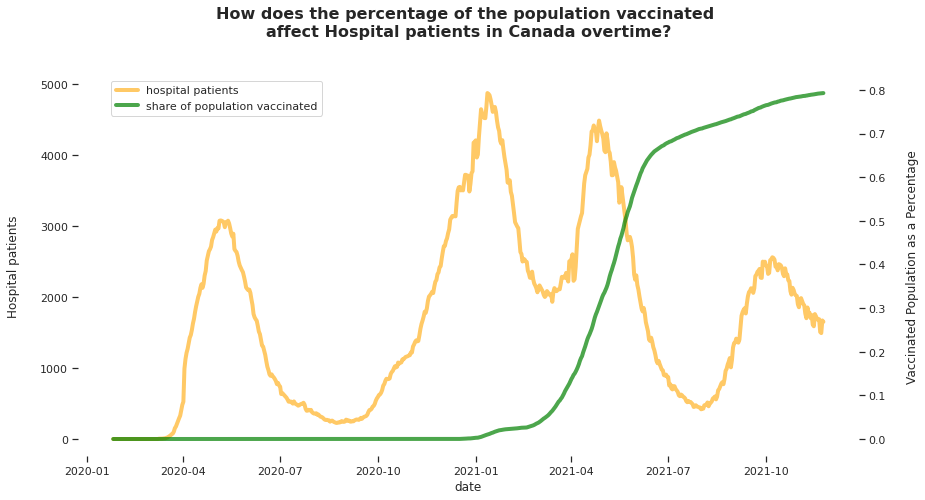

## **Insight 4**
Although there are high and low number changes in the data following the implementation of the vaccine program, the overall trend is still downward, particularly in terms of the number of deaths.

However, as this news points out, we cannot rely solely on vaccines to stop COVID-19. Other safety measures are required.

Notes
At the time this project is being completed in 2021-11-09 (upadated on 2021-11-25), the lowest new case date in Canada is 2021-07-01. Thus, the time frame for the results above are

Before 2020-12-14

Between 2021-12-14 and 2021-07-01

After 2021-07-01

The time frame may change as real-world scenarios change.

# **9.recommendations:**

By applying clustering and time series
forecasting techniques to the COVID-19
vaccine data, this project can uncover
insights such as which regions have similar
vaccine distribution patterns, how adverse
effects are evolving over time, and predict
future trends in vaccine distribution and
potential side effects. These insights could
be valuable for public health planning and
decision-making.